In [2]:
!pip install pycountry

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df  = pd.read_csv('/content/drive/My Drive/BTL_DataMining/BT_6/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:

df.isna().sum() / len(df) * 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [0]:
df2 = df.copy()
df2.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)

In [6]:
df2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [0]:

df2 = df2.sort_values('title').reset_index(drop = True)

In [8]:

df2.isna().sum()


title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [0]:
df2['employment_type'] = df2['employment_type'].bfill(axis=0)
df2['required_experience'] = df2['required_experience'].bfill(axis=0)
df2['required_education'] = df2['required_education'].bfill(axis = 0)
df2['industry'] = df2['industry'].bfill(axis=0)
df2['function'] = df2['function'].bfill(axis=0)

In [10]:
df3 = df2.copy()
df3 = df3[df3['description'].notna()]
df3.isna().sum()

title                     0
location                346
company_profile        3307
description               0
requirements           2694
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           2
required_experience       2
required_education        2
industry                  2
function                  2
fraudulent                0
dtype: int64

In [12]:
df3 = df3.dropna(axis = 0, how = 'any')
df3 = df3.drop_duplicates(keep = 'first')
df4 = df3.copy()
df4.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,"EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Zylun’s mission is to help small and medium si...,Responsibilities:Using a project database syst...,Requirements:1-3 years’ experience of CAD base...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0
13,Accounting Clerk,"US, TX, AUSTIN",As the industry’s largest supply contracting c...,"Job DescriptionVerify, obtain approvals and pa...",High School diploma requiredProficient in usin...,0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1


In [0]:
df4['description'] = df4['description'] + ' ' + df4['requirements'] + ' ' + df4['company_profile']
df4.drop(['company_profile', 'requirements'], axis = 1, inplace = True)

In [14]:
df4.head(3)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1


In [0]:
df4['country_code'] = df4['location'].str.split(',', expand=True)[0]
df4['city'] = df4['location'].str.split(',', expand = True)[2]

In [16]:
df4.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code,city
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US,Houston
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,US,Houston
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,US,Houston
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,PH,Cebu
13,Accounting Clerk,"US, TX, AUSTIN","Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,US,AUSTIN


In [17]:
df4.loc[df4['city'] == ' ', 'city'] = np.nan
df4.isnull().sum()

title                    0
location                 0
description              0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
country_code             0
city                   992
dtype: int64

In [0]:
df4.dropna(inplace = True)

In [22]:
import pycountry
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
def country(df):
    if df['country_code'] in list_alpha_2:
        return pycountry.countries.get(alpha_2 = df['country_code']).name
df4['country_name'] = df4.apply(country, axis = 1)
df4.drop(['location', 'country_code'], axis = 1, inplace = True)
df4.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df_clean = df4.copy()
df_clean.head()
df_clean.to_csv('/content/drive/My Drive/BTL_DataMining/BT_6/clean_data.csv')

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import string
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import string 
import re
import spacy 
spacy.load('/content/drive/My Drive/BTL_DataMining/BT_6/en_core_web_md/en_core_web_md-2.2.5')
from spacy.lang.en import English
parser = English()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df = pd.read_csv("/content/drive/My Drive/BTL_DataMining/BT_6/clean_data.csv")
df.head()

,Unnamed: 0,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
0,2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
1,3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
2,4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
4,13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [33]:
df1 = df.copy()
df1['fraudulent'].value_counts()

0    11023
1      249
Name: fraudulent, dtype: int64

In [0]:

import spacy
nlp = spacy.load('/content/drive/My Drive/BTL_DataMining/BT_6/en_core_web_lg/en_core_web_lg-2.2.5')
stopwords = stopwords.words('english')

def cleanup_text(docs, logging = False):
    punctuations = string.punctuation
    texts = []
    counter = 1
    for doc in docs:
        if counter % 100 == 0 and logging:
            print ("Processed %d out of %d documents."%(counter, len(docs)))
        counter +=1
        doc = nlp(doc, disable = ['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

Fraud_1 = [text for text in df1[df1['fraudulent'] == 1]['description']]
Fraud_0 = [text for text in df1[df1['fraudulent'] == 0]['description']]
Fraud_1_clean = cleanup_text(Fraud_1)
Fraud_1_clean = ' '.join(Fraud_1_clean).split()
Fraud_0_clean = cleanup_text(Fraud_0)
Fraud_0_clean = ' '.join(Fraud_0_clean).split()
Fraud_1_counts = Counter(Fraud_1_clean)
Fraud_0_counts = Counter(Fraud_0_clean)

Fraud_1_common_words = [word[0] for word in Fraud_1_counts.most_common(20)]
Fraud_1_common_counts = [word[1] for word in Fraud_1_counts.most_common(20)]


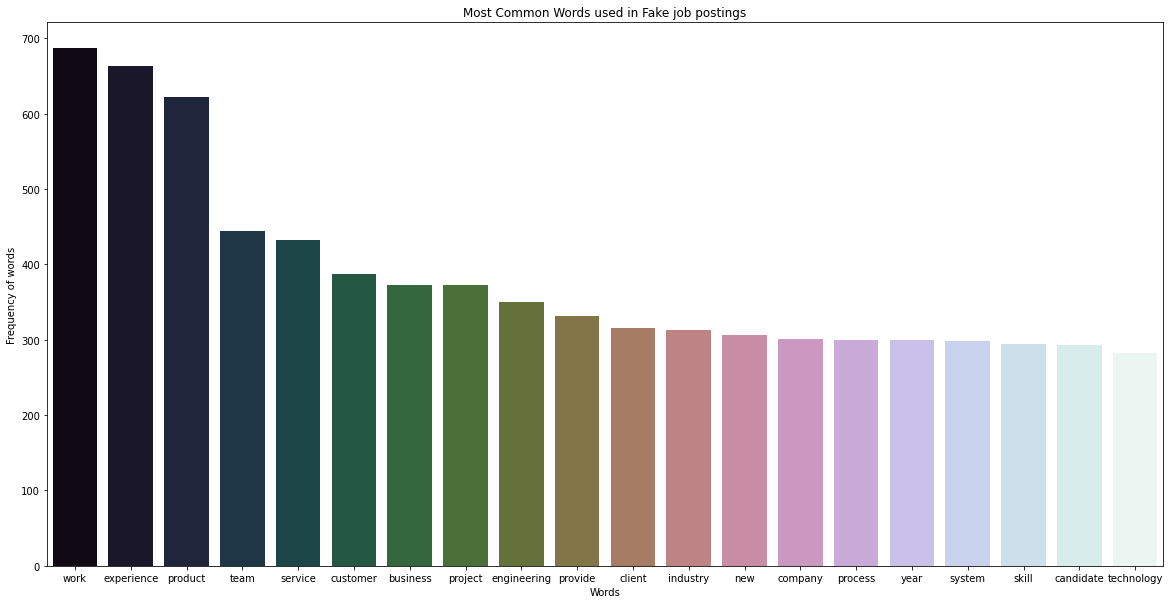

In [37]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_1_common_words, y = Fraud_1_common_counts, palette=pal)
plt.title('Most Common Words used in Fake job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

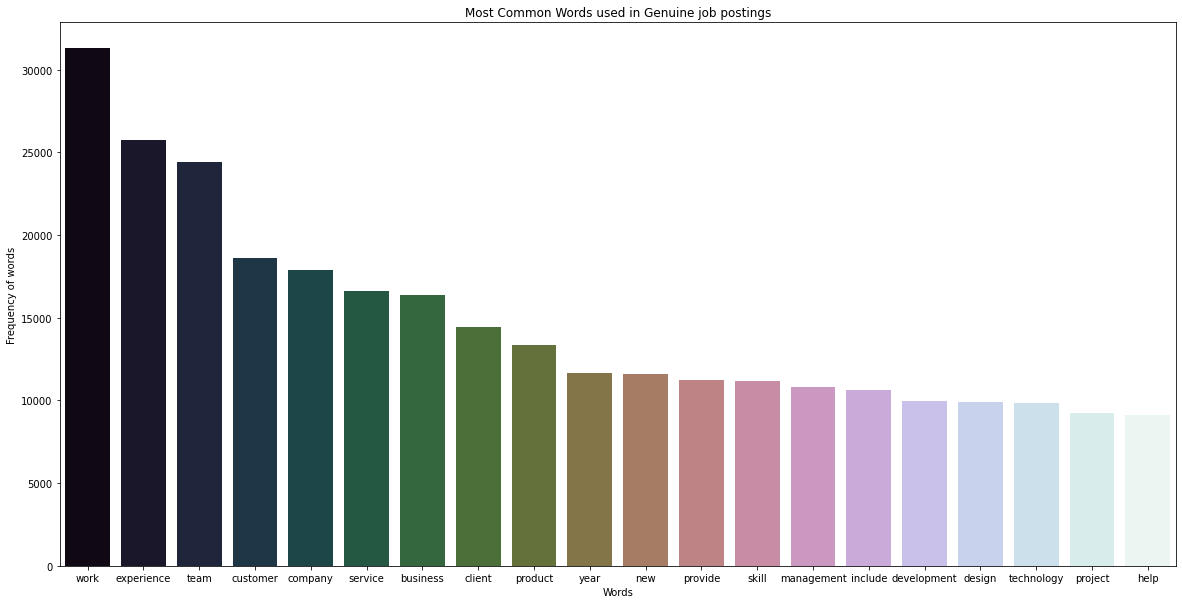

In [38]:
Fraud_0_common_words = [word[0] for word in Fraud_0_counts.most_common(20)]
Fraud_0_common_counts = [word[1] for word in Fraud_0_counts.most_common(20)]
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_0_common_words, y = Fraud_0_common_counts, palette=pal)
plt.title('Most Common Words used in Genuine job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import spacy
nlp = spacy.load('/content/drive/My Drive/BTL_DataMining/BT_6/en_core_web_lg/en_core_web_lg-2.2.5')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
STOPLIST = set(stopwords + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ")

def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)
vectorizer_features = vectorizer.fit_transform(df1['description'])

vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns = vectorizer.get_feature_names())
df_vectorized = pd.concat([df1, vectorized_df], axis = 1)

df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)
df_vectorized.head()

columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)

columns_to_1_hot += ['title', 'city', 'country_name']
df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)
target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)
features.head()

,Unnamed: 0,telecommuting,has_company_logo,has_questions,,experience,looking,tefl,tefl tesol,'s,1,10,100,2,2 years,200,200 cost,3,3 years,30,4,5,5 years,6,:),ability,ability work,able,abroad,abroad :),access,account,accounts,achieve,activities,addition,additional,advanced,advertising,agencies,agency,agile,amazing,amp,amp secure,amp secure jobs,analysis,analytical,analytics,and/or,application,applications,apply,approach,appropriate,apps,area,areas,aspects,assigned,assist,attention,attitude,available,bachelor,background,based,basic,basis,believe,benefits,best,better,big,brand,brands,bring,build,building,built,business,business process,businesses,calls,campaigns,candidate,candidates,capital,care,career,celta,center,challenges,change,changing,check,class,client,clients,close,closely,cloud,code,collaborative,come,comfortable,committed,communicate,communication,communication skills,communications,community,companies,company,competitive,complete,complex,compliance,computer,computer science,consulting,consumer,consumers,contact,content,continually,contract,control,core,corporate,cost,costs,cover,create,creating,creative,credit,critical,cross,culture,current,currently,customer,customer satisfaction,customer service,customers,daily,data,database,day,day day,decisions,dedicated,degree,degree required,degree required,deliver,delivering,delivers,delivery,department,design,designers,develop,developer,developers,developing,development,different,digital,diploma,direct,direction,directly,diverse,document,documentation,drive,driven,driving,duties,dynamic,e,easy,edge,education,effective,effectively,efficient,email,employee,employees,employer,employment,empower,end,energy,engage,engagement,engineer,engineering,engineers,english,enhance,enjoy,ensure,ensuring,enterprise,environment,environments,equipment,equivalent,essential,established,events,excel,excellent,exceptional,exciting,execute,executive,existing,experience,experience,experience preferred,experience working,experienced,experiences,expert,expertise,experts,external,fast,fast growing,fast paced,features,field,finance,financial,firm,flexibility,flexible,focus,focused,follow,following,founded,friendly,fun,functional,functions,future,general,generation,global,goal,goals,good,google,government,great,group,grow,growing,growth,handle,hands,hard,health,help,help teachers,help teachers safe,helping,high,high quality,highest,highly,hire,hiring,holders,home,hours,house,hr,html,human,ideal,ideal candidate,ideas,identify,impact,implement,implementation,important,improve,improvement,include,includes,including,increase,independently,individual,individuals,information,innovation,innovative,integral,integrate,integration,integrity,interactions,interested,internal,international,internet,interpersonal,issues,javascript,job,jobs,jobs abroad,jobs abroad :),join,key,kids,kids paid,know,knowledge,language,large,largest,latest,lead,leader,leadership,leading,learn,learning,level,levels,life,like,limited,line,live,loans,loans credit,local,located,london,long,long term,look,looking,love,mail,maintain,maintaining,maintenance,major,make,making,manage,management,manager,managers,managing,manner,market,marketing,match,maximize,media,meet,meeting,meetings,member,members,microsoft,minimum,mission,mobile,model,month,monthly,monthly 200,monthly 200 cost,months,motivated,ms,multi,multiple,national,necessary,need,needed,needs,network,new,new york,non,number,offer,offering,offers,office,offices,online,open,operating,operations,opportunities,opportunity,optimize,oral,order,organization,organizational,organizations,oriented,outside,outstanding,paced,paid,partner,partners,passion,passionate,passport,people,perform,performance,performing,person,personal,phone,place,plan,planning,plans,platform,platforms,play,play kids,play kids paid,plus,policies,portfolio,position,positions,positive,possess,possible,potential,practice,practices,pre,preferred,present,principles,private,problem,problem solving,problems,procedures,process,processes,

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)
Model_Score = []
Model_Name = []

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [45]:
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']

param_grid = dict(C = c_values, penalty = penalty_options)
grid_tfidf = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)
grid_tfidf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [46]:
grid_tfidf.best_score_
grid_tfidf.best_params_

{'C': 1000, 'penalty': 'l2'}

In [47]:
log_reg_pred = grid_tfidf.predict(X_test)
print (classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1103
           1       0.64      0.36      0.46        25

    accuracy                           0.98      1128
   macro avg       0.81      0.68      0.73      1128
weighted avg       0.98      0.98      0.98      1128



In [0]:
Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(y_test, log_reg_pred), 4))

In [49]:
knn = KNeighborsClassifier()
k_range = list(np.arange(2, 23, 2))
param_grid_knn = dict(n_neighbors = k_range)
print (param_grid_knn)

{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}


In [50]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                         22]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [51]:
grid_knn.best_score_
grid_knn.best_params_

{'n_neighbors': 14}

In [52]:
knn_pred = grid_knn.predict(X_test)
print (classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1103
           1       0.50      0.12      0.19        25

    accuracy                           0.98      1128
   macro avg       0.74      0.56      0.59      1128
weighted avg       0.97      0.98      0.97      1128



In [0]:
Model_Name.append('KNN')
Model_Score.append(round(roc_auc_score(y_test, knn_pred), 4))

In [54]:
svc = SVC()
kernel = ['linear', 'rbf']
param_grid_knn = dict(kernel = kernel)
print (param_grid_knn)

{'kernel': ['linear', 'rbf']}


In [0]:
grid_svc = GridSearchCV(svc, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 2)
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
grid_svc.best_score_
grid_svc.best_params_

In [0]:
svc_pred = grid_svc.predict(X_test)
print (classification_report(y_test, svc_pred))

In [0]:
Model_Name.append('SVC')
Model_Score.append(round(roc_auc_score(y_test, svc_pred), 4))

In [1]:
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)


NameError: ignored

In [0]:
grid_rf.fit(X_train, y_train)
print (grid_rf.best_score_)
print (grid_rf.best_params_)

In [0]:
rf_pred = grid_rf.predict(X_test)
print (classification_report(y_test, rf_pred))

In [0]:
Model_Name.append('Random_Forest')
Model_Score.append(round(roc_auc_score(y_test, rf_pred), 4))

In [0]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()